In [239]:
import sys
sys.version
import platform
print(platform.python_version())

3.6.4


In [240]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np

import random 

import matplotlib.pyplot as plt

from config import api_key
from citipy import citipy


In [241]:
#sample tried citipy 
city = citipy.nearest_city(33.567,-117.72)
cityname= city.city_name
cityname

'laguna woods'

In [242]:
#generate city list 

#randomly picking the co ordinates of lat, lon 
#creating a citi list as df
lat_ = np.arange(-100,100,10)
lon_ = np.arange(-100,100,10)

citi_df = pd.DataFrame()

citi_df["Latitude"] = ""
citi_df["Longitude"] = ""

#2 loop i j for lat lon
for i in lat_:
    #print(i)
    for j in lon_:
        #print(j)
        #list random 
        i_listval = list(np.arange(i, i+10, 0.2))
        j_listval = list(np.arange(j,j+10, 0.2))
        #print(j_listval) 
        #random sample selection  
        lat_1 = random.sample(i_listval, 50)
        lon_1 = random.sample(j_listval, 50)
        latsample = [(i+loc_lat) for loc_lat in lat_1]
        lonsample = [(j+loc_lon) for loc_lon in lon_1]
        
        #adding lat lon to df
        citi_df = citi_df.append(pd.DataFrame.from_dict({"Latitude": latsample, "Longitude" : lonsample}))
citi_df = citi_df.reset_index(drop=True)

#choose cities near by to the coordinates
citi_df["citiname"] = ""
for index, row in citi_df.iterrows():
    city = citipy.nearest_city(row["Latitude"], row["Longitude"])
    citi_df.set_value(index, "citiname", city.city_name)
 

    

C:\Users\neelaJ\AppData\Local\conda\conda\envs\PythonData2\lib\site-packages\ipykernel\__main__.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [243]:
#drop duplicate citi and lan log column
#select random 500 cities near to equator

newciti_df = citi_df.drop(["Latitude", "Longitude"], axis=1)
newciti_df = newciti_df.drop_duplicates()
selectcities = newciti_df.sample(500)
selectcities = selectcities.reset_index(drop=True)


In [244]:
selectcities.iloc[1]
#count of records 
selectcities.shape


(500, 1)

In [245]:
#weather map url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

c= 0
print("Begining of Data Retrival")
print(25*"-")
for index, row in selectcities.iterrows():
    c= c+1
    print(row["citiname"])
    query_url = f"{url}appid={api_key}&q={row['citiname']}&units={units}"
    print(f"Processing record: {c} of set | {row['citiname']} \n{query_url}")
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    selectcities.set_value(index, "Latitude", weather_json.get("coord",{}).get("lat"))
    selectcities.set_value(index, "Longitude", weather_json.get("coord",{}).get("lon"))
    selectcities.set_value(index, "Temperature",weather_json.get("main",{}).get("temp_max"))
    selectcities.set_value(index, "WindSpeed", weather_json.get("wind",{}).get("speed"))
    selectcities.set_value(index, "Cloudiess", weather_json.get("clouds",{}).get("all"))
    selectcities.set_value(index,"Humidity", weather_json.get("main",{}).get("humidity"))

#sample printed to retrive the info 
print(weather_json)

print(25*"-")
print("Data Retrival complete")
print(25*"-")

selectcities

Begining of Data Retrival
-------------------------
longavi
Processing record: 1 of set | longavi 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=longavi&units=imperial


C:\Users\neelaJ\AppData\Local\conda\conda\envs\PythonData2\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\neelaJ\AppData\Local\conda\conda\envs\PythonData2\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\neelaJ\AppData\Local\conda\conda\envs\PythonData2\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\neelaJ\AppData\Local\conda\conda\envs\PythonData2\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\neelaJ\AppData\Local\conda\conda\envs\PythonData2\lib\site-packages\ipykernel\_

huangnihe
Processing record: 2 of set | huangnihe 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=huangnihe&units=imperial
oparino
Processing record: 3 of set | oparino 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=oparino&units=imperial
graneros
Processing record: 4 of set | graneros 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=graneros&units=imperial
riachao do jacuipe
Processing record: 5 of set | riachao do jacuipe 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=riachao do jacuipe&units=imperial
kota tinggi
Processing record: 6 of set | kota tinggi 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=kota tinggi&units=imperial
tateyama
Processing record: 7 of set | tateyama 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=tateyama&units=impe

katima mulilo
Processing record: 53 of set | katima mulilo 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=katima mulilo&units=imperial
kuloy
Processing record: 54 of set | kuloy 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=kuloy&units=imperial
gurjaani
Processing record: 55 of set | gurjaani 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=gurjaani&units=imperial
artyk
Processing record: 56 of set | artyk 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=artyk&units=imperial
urcos
Processing record: 57 of set | urcos 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=urcos&units=imperial
forbes
Processing record: 58 of set | forbes 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=forbes&units=imperial
basoko
Processing record: 59 of set | basoko 


trincomalee
Processing record: 104 of set | trincomalee 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=trincomalee&units=imperial
jerome
Processing record: 105 of set | jerome 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=jerome&units=imperial
treinta y tres
Processing record: 106 of set | treinta y tres 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=treinta y tres&units=imperial
afua
Processing record: 107 of set | afua 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=afua&units=imperial
ambodifototra
Processing record: 108 of set | ambodifototra 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=ambodifototra&units=imperial
sao miguel do araguaia
Processing record: 109 of set | sao miguel do araguaia 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4

haapu
Processing record: 155 of set | haapu 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=haapu&units=imperial
mosquera
Processing record: 156 of set | mosquera 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=mosquera&units=imperial
mirina
Processing record: 157 of set | mirina 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=mirina&units=imperial
oranjemund
Processing record: 158 of set | oranjemund 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=oranjemund&units=imperial
vanavara
Processing record: 159 of set | vanavara 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=vanavara&units=imperial
lakes entrance
Processing record: 160 of set | lakes entrance 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=lakes entrance&units=imperial
prainha
Proce

tubuala
Processing record: 205 of set | tubuala 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=tubuala&units=imperial
ruatoria
Processing record: 206 of set | ruatoria 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=ruatoria&units=imperial
bobcaygeon
Processing record: 207 of set | bobcaygeon 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=bobcaygeon&units=imperial
naraini
Processing record: 208 of set | naraini 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=naraini&units=imperial
tambura
Processing record: 209 of set | tambura 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=tambura&units=imperial
bria
Processing record: 210 of set | bria 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=bria&units=imperial
corrales
Processing record: 211 of se

ho
Processing record: 256 of set | ho 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=ho&units=imperial
yunjinghong
Processing record: 257 of set | yunjinghong 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=yunjinghong&units=imperial
conde
Processing record: 258 of set | conde 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=conde&units=imperial
rudbar
Processing record: 259 of set | rudbar 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=rudbar&units=imperial
liku
Processing record: 260 of set | liku 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=liku&units=imperial
yellowknife
Processing record: 261 of set | yellowknife 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=yellowknife&units=imperial
dinsor
Processing record: 262 of set | dinsor 
ht

uvalde
Processing record: 307 of set | uvalde 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=uvalde&units=imperial
sovetskiy
Processing record: 308 of set | sovetskiy 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=sovetskiy&units=imperial
kafanchan
Processing record: 309 of set | kafanchan 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=kafanchan&units=imperial
ilulissat
Processing record: 310 of set | ilulissat 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=ilulissat&units=imperial
ishigaki
Processing record: 311 of set | ishigaki 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=ishigaki&units=imperial
dolbeau
Processing record: 312 of set | dolbeau 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=dolbeau&units=imperial
dzaoudzi
Processing re

dubuque
Processing record: 358 of set | dubuque 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=dubuque&units=imperial
vanino
Processing record: 359 of set | vanino 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=vanino&units=imperial
wasilla
Processing record: 360 of set | wasilla 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=wasilla&units=imperial
jatai
Processing record: 361 of set | jatai 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=jatai&units=imperial
ous
Processing record: 362 of set | ous 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=ous&units=imperial
paso de carrasco
Processing record: 363 of set | paso de carrasco 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=paso de carrasco&units=imperial
ferme-neuve
Processing record: 364

ust-omchug
Processing record: 408 of set | ust-omchug 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=ust-omchug&units=imperial
santa vitoria do palmar
Processing record: 409 of set | santa vitoria do palmar 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=santa vitoria do palmar&units=imperial
zyryanovsk
Processing record: 410 of set | zyryanovsk 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=zyryanovsk&units=imperial
dongsheng
Processing record: 411 of set | dongsheng 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=dongsheng&units=imperial
kununurra
Processing record: 412 of set | kununurra 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=kununurra&units=imperial
ixtapa
Processing record: 413 of set | ixtapa 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4

kluang
Processing record: 459 of set | kluang 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=kluang&units=imperial
svarychiv
Processing record: 460 of set | svarychiv 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=svarychiv&units=imperial
attawapiskat
Processing record: 461 of set | attawapiskat 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=attawapiskat&units=imperial
punta arenas
Processing record: 462 of set | punta arenas 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=punta arenas&units=imperial
plettenberg bay
Processing record: 463 of set | plettenberg bay 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58c4cfd&q=plettenberg bay&units=imperial
krasnyy chikoy
Processing record: 464 of set | krasnyy chikoy 
http://api.openweathermap.org/data/2.5/weather?appid=0897f22cc4804be6811cd4b6e58

,citiname,Latitude,Longitude,Temperature,WindSpeed,Cloudiess,Humidity
0,longavi,NaN,NaN,NaN,NaN,NaN,NaN
1,huangnihe,43.56,128.02,7.65,4.61,20.0,73.0
2,oparino,59.85,48.28,4.95,6.02,48.0,76.0
3,graneros,-27.65,-65.44,70.06,4.38,92.0,94.0
4,riachao do jacuipe,-11.81,-39.39,80.95,2.10,80.0,79.0
5,kota tinggi,1.73,103.90,78.80,3.36,75.0,88.0
6,tateyama,36.66,137.31,39.20,2.59,90.0,80.0
7,amalfi,6.91,-75.07,70.65,1.54,32.0,96.0
8,kargasok,59.06,80.87,9.58,8.75,36.0,62.0
9,kailua,21.39,-157.74,80.60,13.87,40.0,56.0


In [246]:
#clean data drop the cities with missing nan data
#import to csv file
selectcities.reset_index(drop= True)
selectcities = selectcities.dropna() 
selectcities.to_csv("weather_map_api_citidata.csv")
selectcities

,citiname,Latitude,Longitude,Temperature,WindSpeed,Cloudiess,Humidity
1,huangnihe,43.56,128.02,7.65,4.61,20.0,73.0
2,oparino,59.85,48.28,4.95,6.02,48.0,76.0
3,graneros,-27.65,-65.44,70.06,4.38,92.0,94.0
4,riachao do jacuipe,-11.81,-39.39,80.95,2.10,80.0,79.0
5,kota tinggi,1.73,103.90,78.80,3.36,75.0,88.0
6,tateyama,36.66,137.31,39.20,2.59,90.0,80.0
7,amalfi,6.91,-75.07,70.65,1.54,32.0,96.0
8,kargasok,59.06,80.87,9.58,8.75,36.0,62.0
9,kailua,21.39,-157.74,80.60,13.87,40.0,56.0
10,beldanga,23.94,88.24,60.48,2.89,0.0,66.0


In [247]:
#display the selectcities df
selectcities.head()


,citiname,Latitude,Longitude,Temperature,WindSpeed,Cloudiess,Humidity
1,huangnihe,43.56,128.02,7.65,4.61,20.0,73.0
2,oparino,59.85,48.28,4.95,6.02,48.0,76.0
3,graneros,-27.65,-65.44,70.06,4.38,92.0,94.0
4,riachao do jacuipe,-11.81,-39.39,80.95,2.10,80.0,79.0
5,kota tinggi,1.73,103.90,78.80,3.36,75.0,88.0


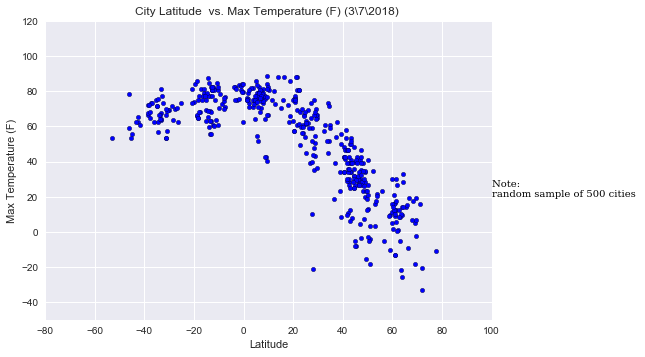

In [248]:
#Bubble Plot of Temperature (F) vs. Latitude
plt.style.use("seaborn")

tdate = pd.tslib.Timestamp.now()
tdate1 = "(" + str(tdate.month) + "\\" + str(tdate.day)+"\\" +str(tdate.year)+ ")" 

font= {"family":"serif",
       "color": "black",
       "weight": "normal",
       "size":10}   

plt.title(f"City Latitude  vs. Max Temperature (F) {tdate1} ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-80,100)
plt.ylim(-50, 120)
plt.grid(True)
plt.text(100,20, "Note: \nrandom sample of 500 cities ", fontdict = font)

plt.scatter(selectcities["Latitude"],selectcities["Temperature"] , s= 20, c = "blue", edgecolor = "black")
plt.savefig("tempvslat.png")
plt.show()

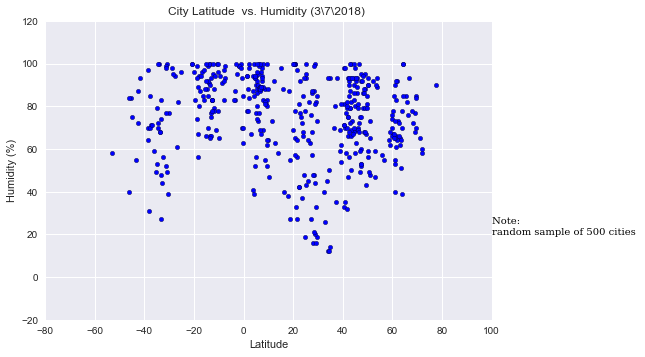

In [249]:
#Bubble Plot of Latitude vs. Humidity Plot
#plt.style.use("seaborn")

plt.title(f"City Latitude  vs. Humidity {tdate1} ")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-80,100)
plt.ylim(-20, 120)
plt.grid(True)
plt.text(100,20, "Note: \nrandom sample of 500 cities ", fontdict = font)


plt.scatter(selectcities["Latitude"],selectcities["Humidity"] , s= 20, c = "blue", edgecolor = "black")
plt.savefig("latvshum.png")
plt.show()

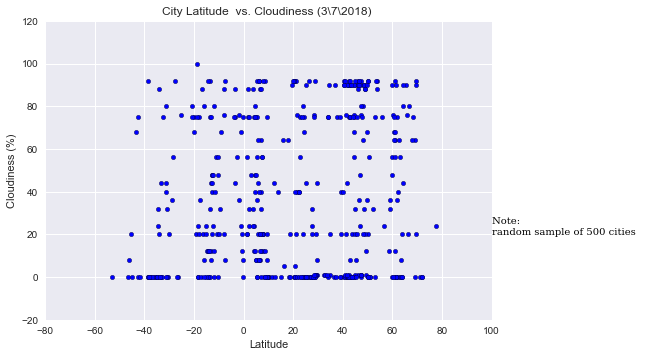

In [250]:
#Bubble Plot of Latitude vs. Cloudiness Plot
#plt.style.use("seaborn")

plt.title(f"City Latitude  vs. Cloudiness {tdate1} ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-80,100)
plt.ylim(-20, 120)
plt.grid(True)
plt.text(100,20, "Note: \nrandom sample of 500 cities ", fontdict = font)


plt.scatter(selectcities["Latitude"],selectcities["Cloudiess"] , s= 20, c = "blue", edgecolor = "black")
plt.savefig("latvsclou.png")
plt.show()

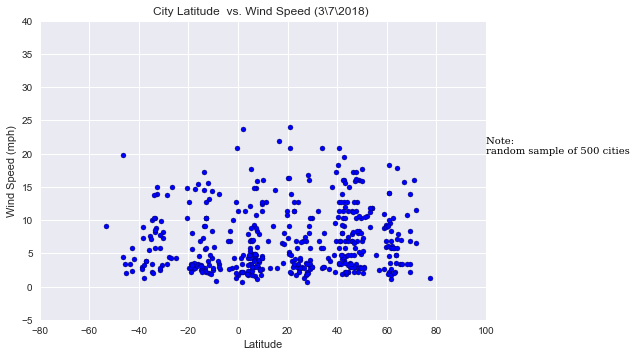

In [251]:
#Bubble Plot of Latitude vs. Wind Speed Plot
#plt.style.use("seaborn")

plt.title(f"City Latitude  vs. Wind Speed {tdate1} ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-80,100)
plt.ylim(-5,40)
plt.grid(True)
plt.text(100,20, "Note: \nrandom sample of 500 cities ", fontdict = font)


plt.scatter(selectcities["Latitude"],selectcities["WindSpeed"] , s= 25, c = "blue", edgecolor = "black")
plt.savefig("latvswin.png")
plt.show()

Observed Trend


This project takes into account weather info of particular day. 
Temprerature along Latitude and logitude chart shows that cities near
to equator line has hotter temprerature.
Temprerature gets warmer as it apporaches the equatorial region.